In [12]:
import torch
import torchvision

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For retina displays
from io import BytesIO
import requests
from torchvision import transforms as T
import random

In [5]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\Harsh/.cache\torch\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [6]:
model.eval()  #Put to Eval Mode

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [7]:
#COCO Instances
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

## User-Def : Functions :

In [9]:
def get_prediction(img, threshold=0.5):
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = model([img]) # pass in a list of images
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # If using GPU, you would have to add .cpu()
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding Boxes for resulted obj detected
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
  pred_box = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_box, pred_class

In [10]:
from urllib.request import urlopen
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
  resp = urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, readFlag)
  return image

In [11]:
def object_detection(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3, url=False):
  if url:
    img = url_to_image(img_path) # If on the internet.
    # Not all images will work though.
  else:
    img = cv2.imread(img_path) # If Local
  
  boxes, pred_clas = get_prediction(img, threshold=threshold)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(boxes)):
    r, g, b = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) # Random Color
    cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(r, g, b), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img, pred_clas[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (r, g, b), thickness=text_th)
  plt.figure(figsize=(15, 15))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
#You need to have WGET in Windows/System32 in order to fetch file..

In [14]:
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg -O car.jpg

--2020-09-14 17:58:27--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.152.155
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.152.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2178423 (2.1M) [image/jpeg]
Saving to: 'car.jpg'

     0K .......... .......... .......... .......... ..........  2%  228K 9s
    50K .......... .......... .......... .......... ..........  4%  477K 7s
   100K .......... .......... .......... .......... ..........  7% 29.9K 26s
   150K .......... .......... .......... .......... ..........  9% 1.30M 20s
   200K .......... .......... .......... .......... .......... 11% 1.23M 16s
   250K .......... .......... .......... .......... .......... 14% 1.16M 13s
   300K .......... .......... .......... .......... .......... 16%  608K 11s
   350K .......... .......... .......... .......... .......... 18% 1.

c:\python38\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)
<ipython-input-11-65033dd35ba0>:12: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.rectangle(img, boxes[i][0], 

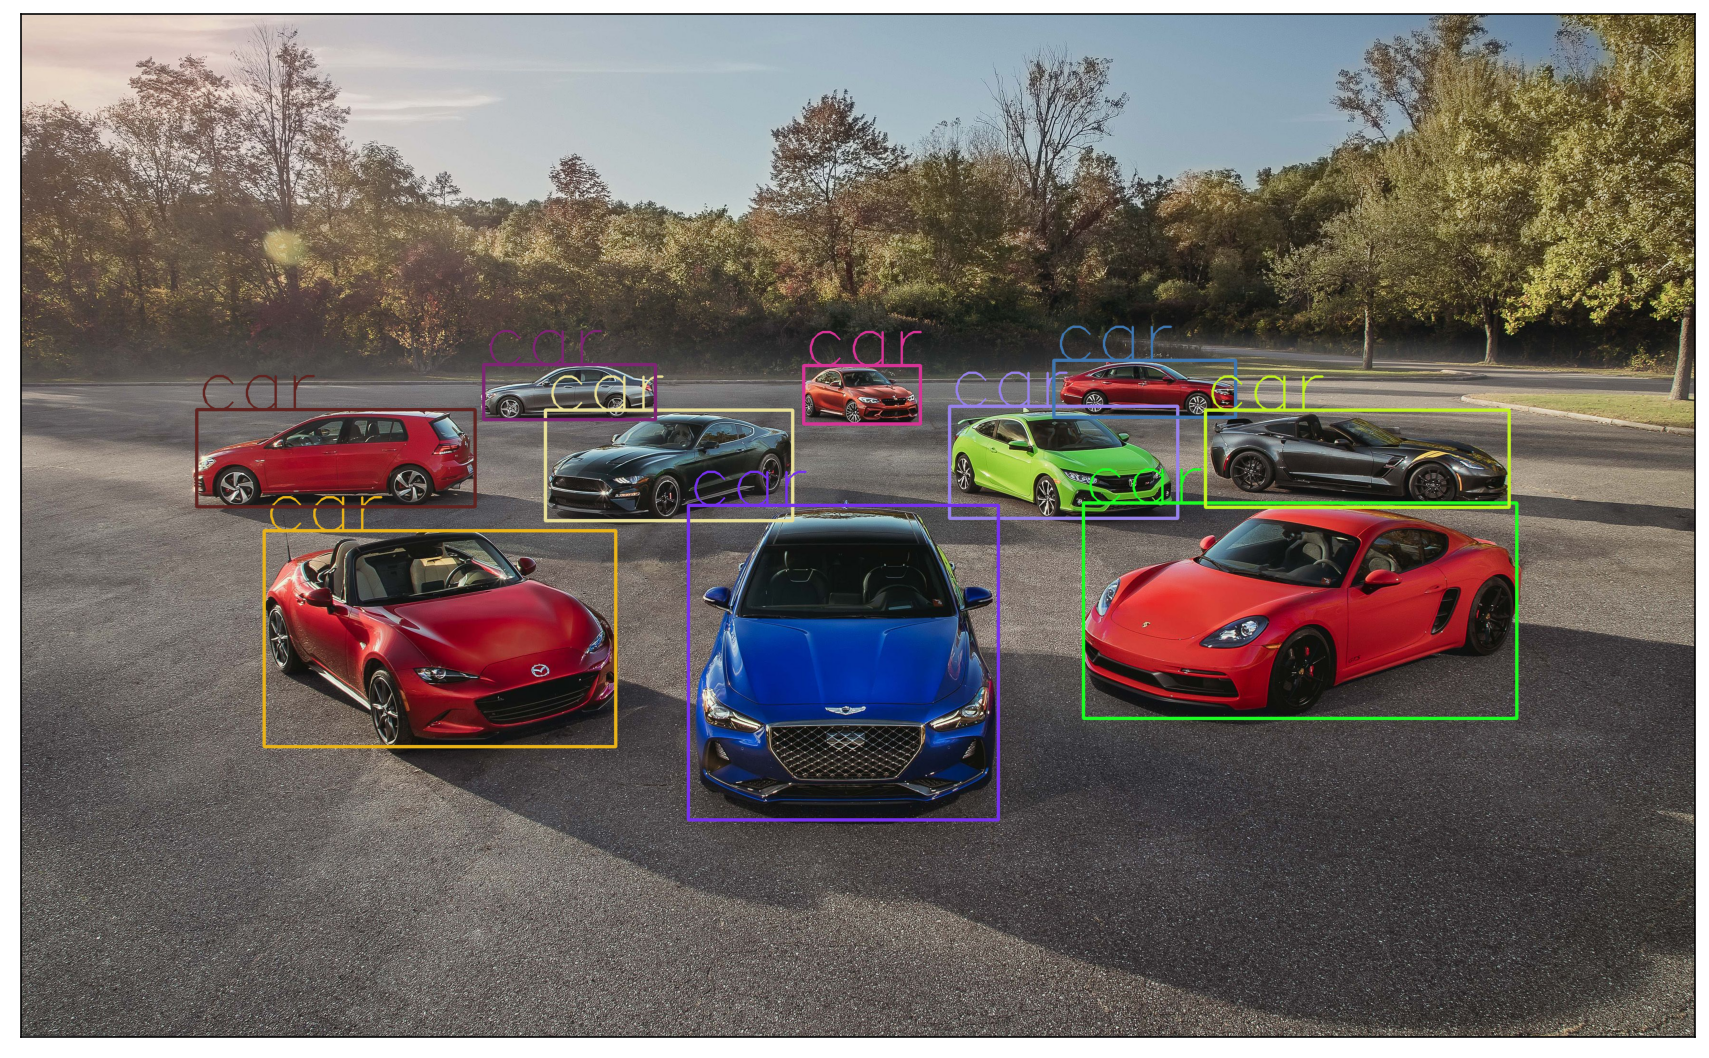

In [15]:
object_detection('./car.jpg', rect_th=5, text_th=4, text_size=5)

<ipython-input-11-65033dd35ba0>:12: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(r, g, b), thickness=rect_th) # Draw Rectangle with the coordinates
<ipython-input-11-65033dd35ba0>:13: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.putText(img, pred_clas[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (r, g, b), thickness=text_th)


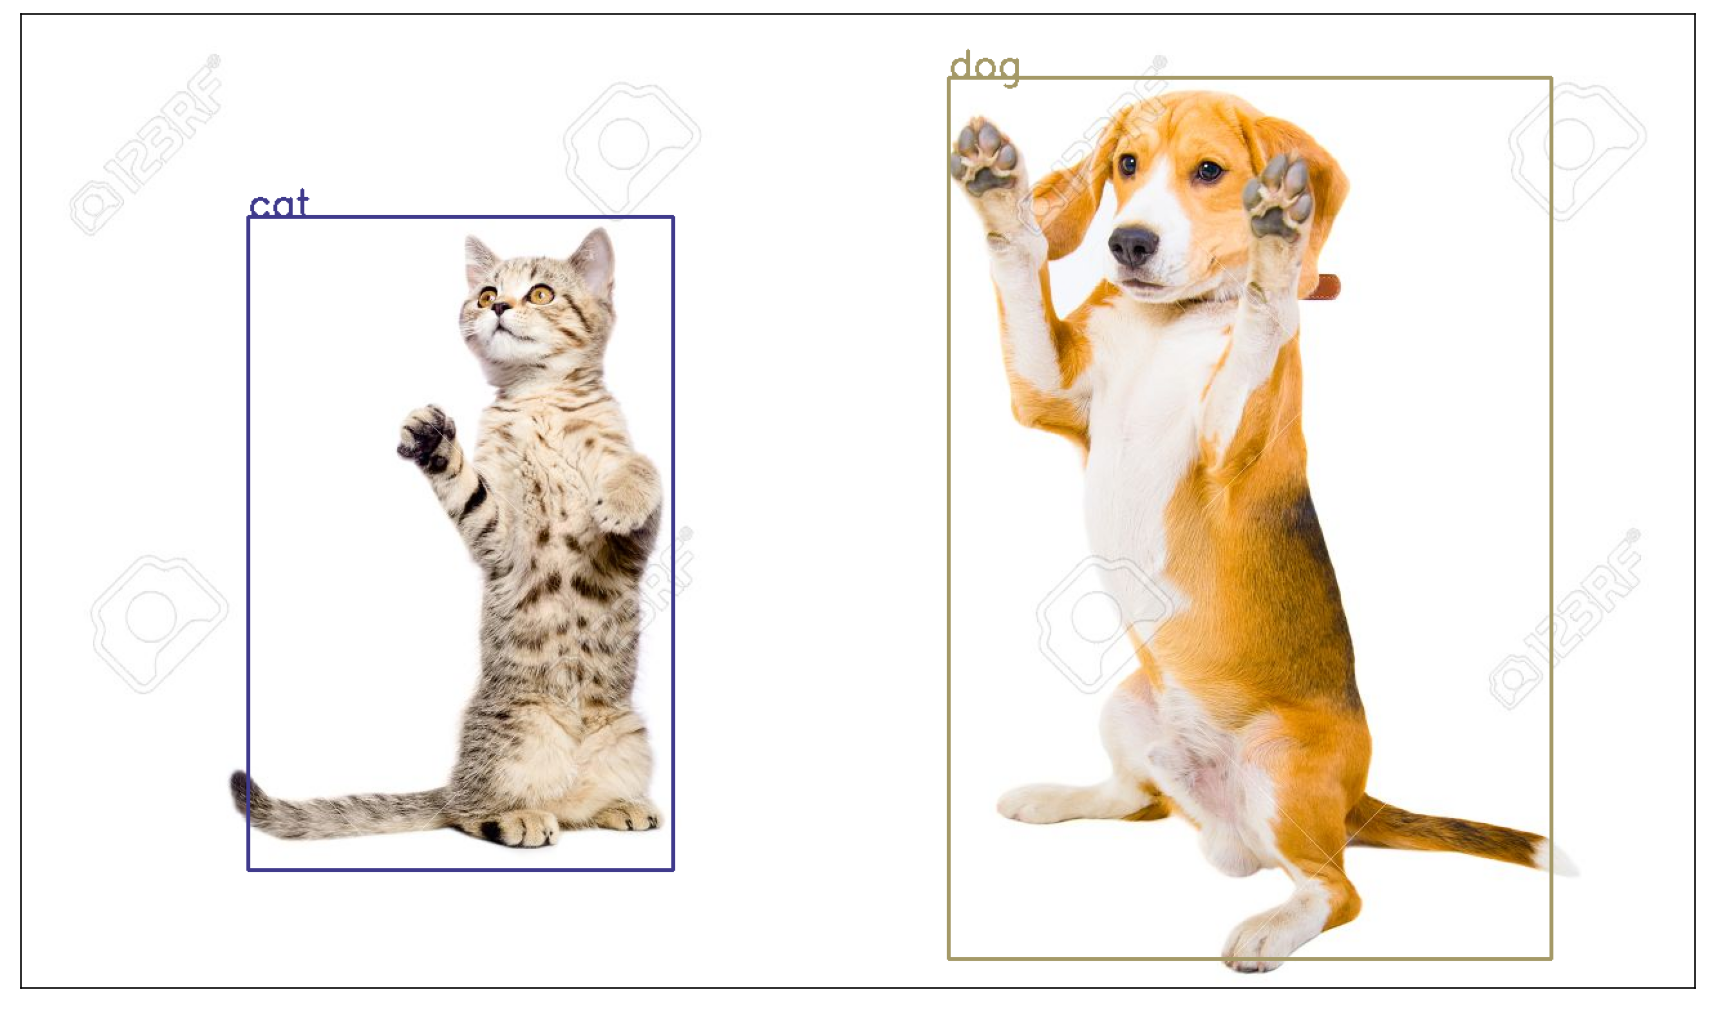

In [16]:
object_detection('https://previews.123rf.com/images/sonsedskaya/sonsedskaya1409/sonsedskaya140900049/32231139-cat-and-dog-standing-on-his-hind-legs.jpg', 
                     rect_th=2, text_th=2, text_size=1, url=True)